## Phishing Domain Detection   model

In [1]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

### importing dataset and dataset analysis

In [2]:
df = pd.read_csv(r"C:\Users\geeth\OneDrive\Desktop\finalproject\dataset\phishing_detection.csv")

In [3]:
df.head()
# result is the target attribute

,id,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [4]:
df.shape

(11055, 32)

In [5]:
df.columns

Index(['id', 'having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   id                           11055 non-null  int64
 1   having_IP_Address            11055 non-null  int64
 2   URL_Length                   11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

checking for null values

In [7]:
# no null values
df.isnull().sum()

id                             0
having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

checking if target class is equally balanced

<Axes: xlabel='Result', ylabel='count'>

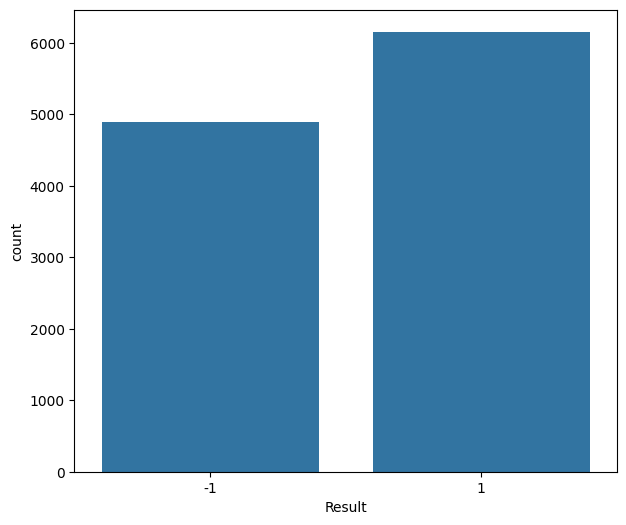

In [8]:
plt.figure(figsize=(7,6))
# count numbers of class records for 'Result' target attribute
sns.countplot(x='Result', data = df)

In [9]:
df['Result'].value_counts()

Result
 1    6157
-1    4898
Name: count, dtype: int64

we can see the target class count is almost equally balanced. Hence Data augmentation is necessary

Identifying multicollinear columns

In [10]:
col_corr = set() # Set of all the names of deleted columns
def correlation(dataset, threshold):
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
      for j in range(i):
          if (abs(corr_matrix.iloc[i, j]) >= threshold) and (corr_matrix.columns[j] not in col_corr):
              colname = corr_matrix.columns[i] # getting the name of column
              col_corr.add(colname)

In [11]:
# remove multicollinear column with collinearity greater than 0.85
correlation(df, 0.85)
col_corr

{'popUpWidnow'}

In [12]:
# identifying weakly correlated features with target attribute
weak_col_corr = set()
def weakcorrelation(dataset, threshold):
  corr_matrix = dataset.corr()
  idx = 0
  for feature in corr_matrix['Result']:
    if(feature < threshold):
      weak_col_corr.add(corr_matrix.columns[idx])
    idx += 1
  
 # dropping features with correlation less than 0.01 
weakcorrelation(df, 0.01)
print(weak_col_corr)

{'id', 'Domain_registeration_length', 'HTTPS_token', 'Abnormal_URL', 'Shortining_Service', 'double_slash_redirecting', 'popUpWidnow', 'Redirect', 'Favicon', 'Iframe'}


In [13]:
# gathering all columns that were identified to be deleted
del_col = col_corr.union(weak_col_corr)
del_col

{'Abnormal_URL',
 'Domain_registeration_length',
 'Favicon',
 'HTTPS_token',
 'Iframe',
 'Redirect',
 'Shortining_Service',
 'double_slash_redirecting',
 'id',
 'popUpWidnow'}

In [14]:
# dropping columns permanantly
df.drop(del_col, axis = 1, inplace = True)

In [15]:
df.isnull().sum()

having_IP_Address         0
URL_Length                0
having_At_Symbol          0
Prefix_Suffix             0
having_Sub_Domain         0
SSLfinal_State            0
port                      0
Request_URL               0
URL_of_Anchor             0
Links_in_tags             0
SFH                       0
Submitting_to_email       0
on_mouseover              0
RightClick                0
age_of_domain             0
DNSRecord                 0
web_traffic               0
Page_Rank                 0
Google_Index              0
Links_pointing_to_page    0
Statistical_report        0
Result                    0
dtype: int64

### splitting dataset into train and test 

In [16]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [17]:
# input attribute and target attribute
X = df.iloc[: , :-1]
y = df.iloc[:, -1:]

In [18]:
y

,Result
0,-1
1,-1
2,-1
3,-1
4,1
...,...
11050,1
11051,-1
11052,-1
11053,-1


In [19]:
# train test split with test size as 0.25 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

## SVM

In [20]:
from sklearn.svm import SVC
# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, gamma= 1, kernel='sigmoid', random_state=42)


In [21]:
svc_model.fit(X_train, y_train)

SVC(C=0.1, gamma=1, kernel='sigmoid', random_state=42)

In [22]:
prediction = svc_model .predict(X_test)
# check the accuracy on the training set
print('Accuracy of training data: ', svc_model.score(X_train, y_train))
print('Accuracy of validation data: ',svc_model.score(X_test, y_test))

Accuracy of training data:  0.7096852008201664
Accuracy of validation data:  0.701519536903039


In [23]:
from sklearn.metrics import confusion_matrix, classification_report
# generating classification report
print(classification_report(y_test, prediction))


              precision    recall  f1-score   support

          -1       0.67      0.66      0.66      1236
           1       0.73      0.74      0.73      1528

    accuracy                           0.70      2764
   macro avg       0.70      0.70      0.70      2764
weighted avg       0.70      0.70      0.70      2764



In [24]:
confusion_matrix(y_test, prediction)

array([[ 811,  425],
       [ 400, 1128]], dtype=int64)

<Axes: >

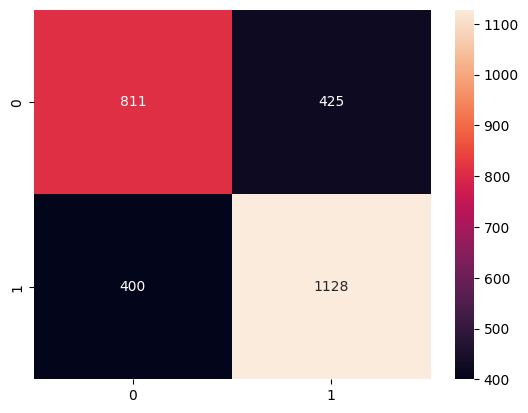

In [25]:
sns.heatmap(confusion_matrix(y_test, prediction), annot = True, fmt='0.0f')

## K-nearest Neighbors

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

 choosing the best values of k (neighbours)

In [27]:
neighbour = []
accuracy = []
for k in range(1, 20):
  k_near = KNeighborsClassifier(n_neighbors=k)
  k_near.fit(X,y)
  Y_pre_test = k_near.predict(X_test)
  Y_pre_train = k_near.predict(X_train)
  test_accurry = accuracy_score(Y_pre_test, y_test)
  neighbour.append(k)
  accuracy.append(test_accurry)

Text(0, 0.5, 'accuracy')

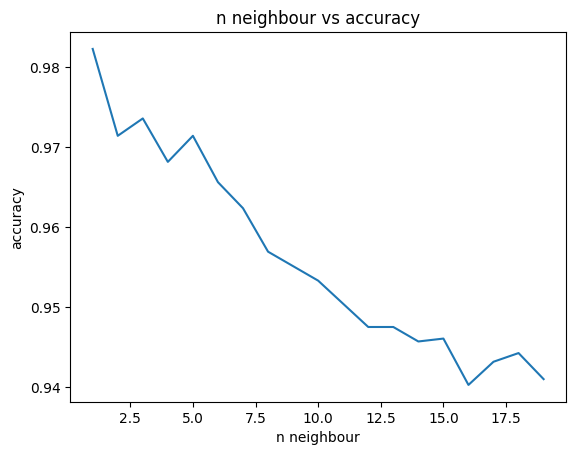

In [28]:
# plotting for n neighbour vs accuracy

plt.plot(neighbour, accuracy)
plt.title('n neighbour vs accuracy')
plt.xlabel('n neighbour')
plt.ylabel('accuracy')

we can see the accuracy is highest for n_neighbours = 1

#### KNN with n_neighbour = 1

In [29]:
k_near = KNeighborsClassifier(n_neighbors=1)
k_near.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [30]:
Y_pre_test = k_near.predict(X_test)
Y_pre_train = k_near.predict(X_train)

In [31]:
Y_pre_test = k_near.predict(X_test.values)
Y_pre_train = k_near.predict(X_train.values)

In [32]:
from sklearn.metrics import accuracy_score
train_accurry = accuracy_score(Y_pre_train, y_train)
test_accurry = accuracy_score(Y_pre_test, y_test)
print('Accuracy for train dataset for K-neariest : ', train_accurry)
print('Accuracy for test dataset for K-neariest : ', test_accurry)

Accuracy for train dataset for K-neariest :  0.9828729948136533
Accuracy for test dataset for K-neariest :  0.9489869753979739


In [33]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, Y_pre_test ))

              precision    recall  f1-score   support

          -1       0.94      0.95      0.94      1236
           1       0.96      0.95      0.95      1528

    accuracy                           0.95      2764
   macro avg       0.95      0.95      0.95      2764
weighted avg       0.95      0.95      0.95      2764



In [34]:
confusion_matrix(y_test, Y_pre_test )

array([[1175,   61],
       [  80, 1448]], dtype=int64)

<Axes: >

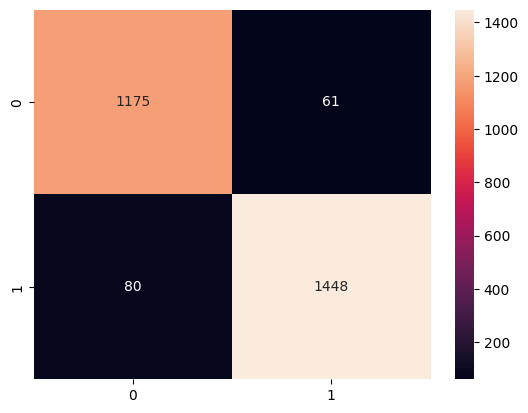

In [35]:
sns.heatmap(confusion_matrix(y_test, Y_pre_test), annot = True, fmt='0.0f')

## Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB, BernoulliNB, ComplementNB

In [37]:
# Bernoullis Navaive bayes classifier
nvb = BernoulliNB()
nvb.fit(X_train,y_train)

BernoulliNB()

In [38]:
y_pre_test = nvb.predict(X_test)
y_pre_train = nvb.predict(X_train)

In [39]:
from sklearn.metrics import accuracy_score
train_accurry = accuracy_score(y_pre_train, y_train)
test_accurry = accuracy_score(y_pre_test, y_test)
print('Accuracy for train dataset for naive bayes  reg : ', train_accurry)
print('Accuracy for test dataset for naive bayes reg : ', test_accurry)

Accuracy for train dataset for naive bayes  reg :  0.911590881678929
Accuracy for test dataset for naive bayes reg :  0.9059334298118669


In [40]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pre_test ))


              precision    recall  f1-score   support

          -1       0.90      0.89      0.89      1236
           1       0.91      0.92      0.92      1528

    accuracy                           0.91      2764
   macro avg       0.91      0.90      0.90      2764
weighted avg       0.91      0.91      0.91      2764



In [41]:
confusion_matrix(y_test, y_pre_test)

array([[1096,  140],
       [ 120, 1408]], dtype=int64)

<Axes: >

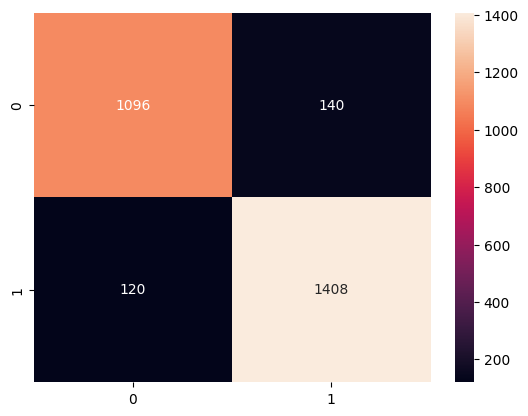

In [42]:
sns.heatmap(confusion_matrix(y_test, y_pre_test), annot = True, fmt='0.0f')

## Hybrid Ensembler

Ensembler method used - Max voting: It is mainly used for classification problems. The method consists of building multiple models independently and getting their individual output called ‘vote’. The class with maximum votes is returned as output.

In [43]:
# importing voting classifier
from sklearn.ensemble import VotingClassifier

In [44]:
model_1 = SVC()
model_2 = KNeighborsClassifier(n_neighbors=1)
model_3 = BernoulliNB()
ensemble = VotingClassifier(estimators=[('SVM', model_1), ('KNN', model_2), ('NaiveBayes', model_3),], voting='hard')


In [45]:
ensemble.fit(X_train, y_train)
y_pred_test = ensemble.predict(X_test)
y_pred_train = ensemble.predict(X_train)

In [46]:
ensemble.fit(X_train, y_train)
y_pred_test = ensemble.predict(X_test.values)
y_pred_train = ensemble.predict(X_train.values)

In [47]:
from sklearn.metrics import accuracy_score
train_accurry = accuracy_score(y_pred_train, y_train)
test_accurry = accuracy_score(y_pred_test, y_test)
print('Accuracy for train dataset for naive bayes  reg : ', train_accurry)
print('Accuracy for test dataset for naive bayes reg : ', test_accurry)

Accuracy for train dataset for naive bayes  reg :  0.9583886141599325
Accuracy for test dataset for naive bayes reg :  0.9439218523878437


In [48]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(ensemble, open(filename, 'wb'))

In [49]:
print(X_test.values)

[[-1 -1  1 ...  1  1  1]
 [ 1 -1  1 ...  1  0  1]
 [-1 -1  1 ... -1 -1  1]
 ...
 [-1  1 -1 ... -1  1  1]
 [ 1 -1  1 ...  1  1 -1]
 [-1 -1  1 ...  1  1  1]]


In [50]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

# True Positives, False Positives, True Negatives, False Negatives
TN, FP, FN, TP = conf_matrix.ravel()

# Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Precision
precision = precision_score(y_test, y_pred_test)

# Recall
recall = recall_score(y_test, y_pred_test)

# Specificity
specificity = TN / (TN + FP)

# F1 Score
f1 = f1_score(y_test, y_pred_test)


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1)


Accuracy: 0.9439218523878437
Precision: 0.9397821909032671
Recall: 0.9600785340314136
Specificity: 0.9239482200647249
F1 Score: 0.9498219488507609
